In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

# Load Data

In [119]:
oo = pd.read_csv('all_rankings.csv')
oo.head()

,year,PCT team,PCT,PPG team,PPG,OPPG team,OPPG,SPG team,SPG,APG team,...,FTP team,FTP,SCMG team,SCMG,RPI team,RPI,SOS team,SOS,ID team,ID
0,2017.0,Gonzaga,94.9,The Citadel,89.8,Virginia,56.4,West Virginia,10.0,UCLA,...,Notre Dame,80.0,Gonzaga,21.1,North Carolina,0.668,North Carolina,0.607,Abilene Christian,1101
1,2017.0,Villanova,88.9,UCLA,89.8,Saint Mary's,57.5,Portland St.,9.9,Purdue,...,Central Mich.,79.1,Wichita St.,18.6,Kentucky,0.658,Vanderbilt (19-16),0.606,Air Force,1102
2,2017.0,Arizona,86.5,Central Mich.,88.3,SMU,60.0,Fordham,9.8,Lipscomb,...,Villanova,79.0,West Virginia,14.8,Kansas,0.656,Louisville (25-9),0.604,Akron,1103
3,2017.0,Middle Tenn.,86.1,Purdue Fort Wayne,86.9,Saint Peter's,60.8,Eastern Mich.,9.6,North Carolina,...,Oklahoma St.,78.9,Saint Mary's,14.6,Villanova,0.655,Baylor (26-8),0.601,Alabama,1104
4,2017.0,UCLA,86.1,Oklahoma St.,85.7,Old Dominion,61.2,Holy Cross,9.4,Iowa,...,Mercer,78.2,Villanova,14.5,Arizona,0.652,Virginia (23-11),0.600,Alabama A&M,1105


In [120]:
oo = oo.fillna('no data')
oo = oo.set_index('year')
oo

,PCT team,PCT,PPG team,PPG,OPPG team,OPPG,SPG team,SPG,APG team,APG,FTP team,FTP,SCMG team,SCMG,RPI team,RPI,SOS team,SOS,ID team,ID
year,,,,,,,,,,,,,,,,,,,,
2017.0,Gonzaga,94.9,The Citadel,89.8,Virginia,56.4,West Virginia,10,UCLA,21.4,Notre Dame,80,Gonzaga,21.1,North Carolina,0.668,North Carolina,0.607,Abilene Christian,1101
2017.0,Villanova,88.9,UCLA,89.8,Saint Mary's,57.5,Portland St.,9.9,Purdue,18.3,Central Mich.,79.1,Wichita St.,18.6,Kentucky,0.658,Vanderbilt (19-16),0.606,Air Force,1102
2017.0,Arizona,86.5,Central Mich.,88.3,SMU,60,Fordham,9.8,Lipscomb,18.2,Villanova,79,West Virginia,14.8,Kansas,0.656,Louisville (25-9),0.604,Akron,1103
2017.0,Middle Tenn.,86.1,Purdue Fort Wayne,86.9,Saint Peter's,60.8,Eastern Mich.,9.6,North Carolina,18.1,Oklahoma St.,78.9,Saint Mary's,14.6,Villanova,0.655,Baylor (26-8),0.601,Alabama,1104
2017.0,UCLA,86.1,Oklahoma St.,85.7,Old Dominion,61.2,Holy Cross,9.4,Iowa,17.7,Mercer,78.2,Villanova,14.5,Arizona,0.652,Virginia (23-11),0.6,Alabama A&M,1105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,Wright St.,1460
no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,Wyoming,1461
no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,Xavier,1462


In [121]:
gd = pd.read_csv('games.csv')
gd.head()

,team A,team B,y,yr
0,1104,1157,1,17
1,1336,1107,-1,-6
2,1112,1277,1,2
3,1113,1340,1,18
4,1116,1236,1,9


# Prepare Data for Training

In [122]:
number_of_games = len(gd.index)
x1 = np.zeros(shape=(number_of_games,1))
y = gd['yr'].values
year = 2017.0

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']

    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]

    x_A = ((oo.loc[oo['RPI team'].str.rstrip() == teamA])['RPI']).values[0]
    x_B = ((oo.loc[oo['RPI team'].str.rstrip() == teamB])['RPI']).values[0]
    x1[p] = (x_A - x_B)  

In [123]:
number_of_games = len(gd.index)
x2 = np.zeros(shape=(number_of_games,1))

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']

    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]

    x_A = ((oo.loc[oo['SCMG team'].str.rstrip() == teamA])['SCMG']).values[0]
    x_B = ((oo.loc[oo['SCMG team'].str.rstrip() == teamB])['SCMG']).values[0]
    x2[p] = (x_A - x_B) 

In [124]:
number_of_games = len(gd.index)
x3 = np.zeros(shape=(number_of_games,1))

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']

    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]

    x_A = ((oo.loc[oo['FTP team'].str.rstrip() == teamA])['FTP']).values[0]
    x_B = ((oo.loc[oo['FTP team'].str.rstrip() == teamB])['FTP']).values[0]
    x3[p] = (x_A - x_B)   

In [125]:
number_of_games = len(gd.index)
x4 = np.zeros(shape=(number_of_games,1))

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']

    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]

    x_A = ((oo.loc[oo['APG team'].str.rstrip() == teamA])['APG']).values[0]
    x_B = ((oo.loc[oo['APG team'].str.rstrip() == teamB])['APG']).values[0]
    x4[p] = (x_A - x_B)   

In [245]:
number_of_games = len(gd.index)
x5 = np.zeros(shape=(number_of_games,1))

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']
    
    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]
    
    if len(((oo.loc[oo['PPG team'].str.rstrip() == teamA.rstrip()])['PPG']).values)>0 and len(((oo.loc[oo['PPG team'].str.rstrip() == teamB.rstrip()])['PPG']).values)>0:
        x_A = ((oo.loc[oo['PPG team'].str.rstrip() == teamA.rstrip()])['PPG']).values[0] 
        x_B = ((oo.loc[oo['PPG team'].str.rstrip() == teamB.rstrip()])['PPG']).values[0] 
    x5[p] = (x_A - x_B)   

In [254]:
number_of_games = len(gd.index)
x6 = np.zeros(shape=(number_of_games,1))

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']
    
    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]
    
    if len(((oo.loc[oo['PCT team'].str.rstrip() == teamA.rstrip()])['PCT']).values)>0 and len(((oo.loc[oo['PCT team'].str.rstrip() == teamB.rstrip()])['PCT']).values)>0:
        x_A = ((oo.loc[oo['PCT team'].str.rstrip() == teamA.rstrip()])['PCT']).values[0] 
        x_B = ((oo.loc[oo['PCT team'].str.rstrip() == teamB.rstrip()])['PCT']).values[0] 
    x6[p] = (x_A - x_B)   

In [266]:
number_of_games = len(gd.index)
x7 = np.zeros(shape=(number_of_games,1))

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']
    
    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]
    
    if len(((oo.loc[oo['OPPG team'].str.rstrip() == teamA.rstrip()])['OPPG']).values)>0 and len(((oo.loc[oo['OPPG team'].str.rstrip() == teamB.rstrip()])['OPPG']).values)>0:
        x_A = ((oo.loc[oo['OPPG team'].str.rstrip() == teamA.rstrip()])['OPPG']).values[0] 
        x_B = ((oo.loc[oo['OPPG team'].str.rstrip() == teamB.rstrip()])['OPPG']).values[0] 
    x7[p] = (x_A - x_B)   

In [301]:
number_of_games = len(gd.index)
x8 = np.zeros(shape=(number_of_games,1))

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']
    
    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]
    
    if len(((oo.loc[oo['SPG team'].str.rstrip() == teamA.rstrip()])['SPG']).values)>0 and len(((oo.loc[oo['SPG team'].str.rstrip() == teamB.rstrip()])['SPG']).values)>0:
        x_A = ((oo.loc[oo['SPG team'].str.rstrip() == teamA.rstrip()])['SPG']).values[0] 
        x_B = ((oo.loc[oo['SPG team'].str.rstrip() == teamB.rstrip()])['SPG']).values[0] 
    x8[p] = (x_A - x_B)   

In [322]:
number_of_games = len(gd.index)
x9 = np.zeros(shape=(number_of_games,1))

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']
    
    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]
    
    if len(((oo.loc[oo['SOS team'].str.rstrip() == teamA.rstrip()])['SOS']).values)>0 and len(((oo.loc[oo['SOS team'].str.rstrip() == teamB.rstrip()])['SOS']).values)>0:
        x_A = ((oo.loc[oo['SOS team'].str.rstrip() == teamA.rstrip()])['SOS']).values[0] 
        x_B = ((oo.loc[oo['SOS team'].str.rstrip() == teamB.rstrip()])['SOS']).values[0] 
    x9[p] = (x_A - x_B)   

In [363]:
X = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9),axis=1)
y.shape = (number_of_games,)

(5395, 9)


# Train Data with Regression Forest 

## split data into training and test set

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## build forest

In [347]:
regressor = RandomForestRegressor(n_estimators=200, min_samples_leaf=10, max_features = 'sqrt',random_state=0)

In [348]:
regressor.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=10,
                      n_estimators=200, random_state=0)

# Test Data

In [349]:
y_pred = regressor.predict(X_test)

In [361]:
from sklearn import metrics

rms_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMS Error:', rms_error)

RMS Error: 11.385543973069407


## plot test results

correlation coefficient: 0.6663059246354428
bias: -0.3969137553962669


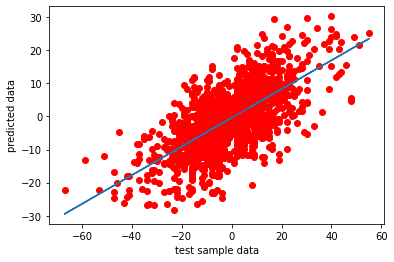

In [351]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred)
print("correlation coefficient: {}".format(r_value))
print("bias: {}".format(intercept))
plt.scatter(y_test, y_pred,color='r')
plt.plot(y_test, slope*y_test + intercept)
plt.xlabel("test sample data")
plt.ylabel("predicted data")
plt.show()

In [355]:
test_error = np.average(abs(y_test - y_pred))
print("test error: {}".format(test_error))

test error: 8.795737187806155


# 

<BarContainer object of 9 artists>

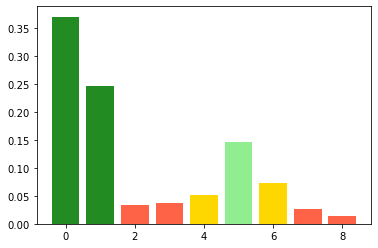

In [379]:
importance = regressor.feature_importances_

clrs = ['tomato' if (x < 0.05) else ('gold' if (x>=0.05 and x<0.1) else ('lightgreen' if (x>=0.1 and x<0.2) else 'forestgreen')) for x in importance]
plt.bar([x for x in range(len(importance))], importance,color=clrs)

# Test a Game

In [380]:
X_test_game = np.array([[-0.0006,4.3,-2.1,2.1,3.9,0.157,-0.4,-2,0.0182]])
game_prediction = regressor.predict(X_test_game)
print(game_prediction)

[0.37196862]


## Establish Win Confidence

In [381]:
from scipy.stats import norm

mu = game_prediction
sigma = rms_error

win_probability = (1 - norm.cdf(0, loc=mu, scale=sigma))[0]
print("team A win confidence: {}".format(win_probability))

team A win confidence: 0.5130312278368343
